## Exercise 1

In this exercise, you will use PCA to reduce the MINST data set and visualize the approximation.

### Step 1: Load the data

You don't actually have to do anything here!  Just run the code...

In [2]:
# @SHOW
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load MNIST data
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist["data"].values, mnist["target"].astype(int).values

# Sample the dataset to speed up computation (Optional)
X, y = X[:7000], y[:7000]

# Split the dataset
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Use PCA to reduce the data set


Visualize your result with a 2d scatter plot, colored by class (the digit identitiy)

/tmp/ipykernel_3229/1174479675.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("tab10", 10),


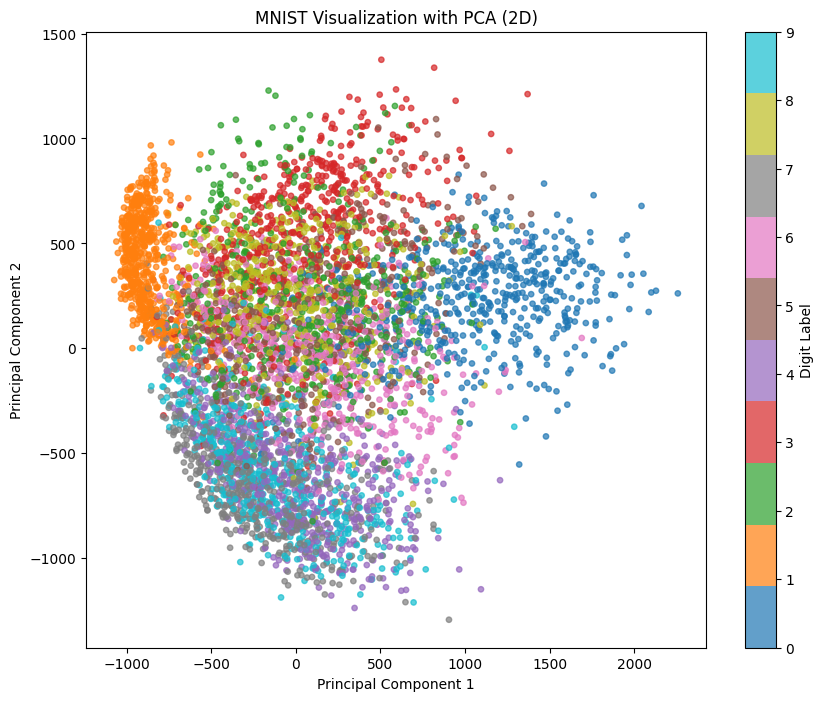

In [3]:
# Your code here
# Step 2: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_mnist_train_2d = pca.fit_transform(X_mnist_train)
X_mnist_test_2d = pca.transform(X_mnist_test)

# Step 3: Plot the 2D scatter plot for training set
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_mnist_train_2d[:, 0],
    X_mnist_train_2d[:, 1],
    c=y_mnist_train,
    cmap=plt.cm.get_cmap("tab10", 10),
    alpha=0.7,
    s=15
)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.title("MNIST Visualization with PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


#### Step 3: Scree plot

Calculate and visualize a scree plot for the first 40 component.  The y-axis should be 'percent of variance explained'.

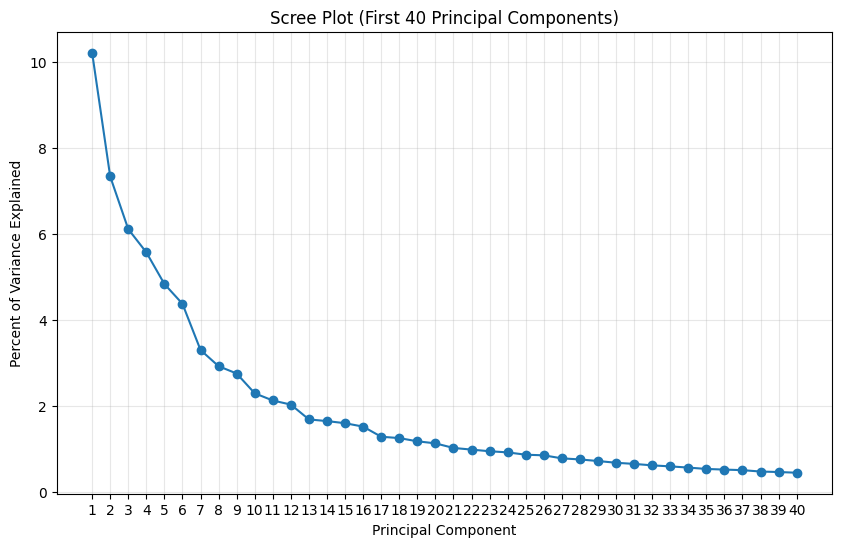

In [4]:
# Your code here
# Step 3: Scree Plot
pca_full = PCA(n_components=40)  # first 40 components
pca_full.fit(X_mnist_train)

# Variance explained ratio
explained_variance_ratio = pca_full.explained_variance_ratio_ * 100  # convert to %

# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 41), explained_variance_ratio, marker='o', linestyle='-')
plt.title("Scree Plot (First 40 Principal Components)")
plt.xlabel("Principal Component")
plt.ylabel("Percent of Variance Explained")
plt.xticks(range(1, 41))
plt.grid(True, alpha=0.3)
plt.show()


#### Step 4: Select the number of components


Calculate the number of components required to explain 95% of the variance

In [6]:
# Your code here
# Step 4: Calculate number of components for 95% variance
pca_all = PCA()  
pca_all.fit(X_mnist_train)

cumulative_variance = np.cumsum(pca_all.explained_variance_ratio_)
n_components_95 = np.searchsorted(cumulative_variance, 0.95) + 1

print("Number of components that explain at least 95% variance:", n_components_95)



Number of components that explain at least 95% variance: 148


### Step 5: Visualize a digit in the reduced dimensionality space


I've provided a function for visualizing a digit. Figure out how to visualize the same digit using the number of dimensions identified in Step 4.

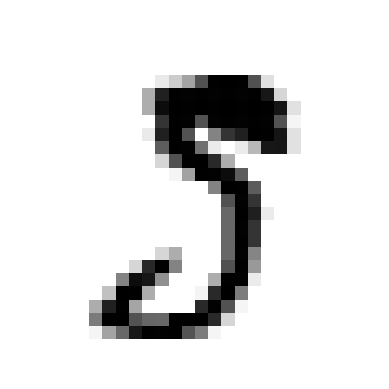

In [10]:
# @SHOW
def plot_mnist_digit(digit):
    """Plot a single MNIST digit.

    Parameters:
    digit (numpy array): A flattened 1D numpy array of length 784.

    """
    # Reshape the flattened digit to 28x28 image
    digit_image = digit.reshape(28, 28)
    
    plt.imshow(digit_image, cmap='binary')
    plt.axis("off")
    plt.show()

plot_mnist_digit(X_mnist_train[0])

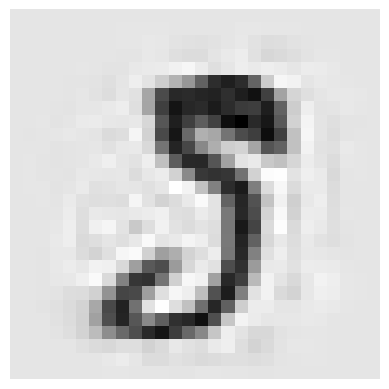

In [15]:
# Your code here
# Step 5: Visualize a digit in reduced dimensionality space

# Refit PCA with the optimal number of components from Step 4
pca_reduced = PCA(n_components= 148)
X_train_reduced = pca_reduced.fit_transform(X_mnist_train)

# Pick one digit (same as before)
digit_index = 0
original_digit = X_mnist_train[digit_index]

# Project it down to reduced space and then reconstruct it back
digit_reduced = pca_reduced.transform([original_digit])
digit_reconstructed = pca_reduced.inverse_transform(digit_reduced)

# Plot the reconstructed digit
plot_mnist_digit(digit_reconstructed)


### Step 6: Use dimensionality reduction to preprocess data


See how a KNN Classifier works with and without dimensionality reduction. Preserve 80% of the variance.

In [ ]:
# Your code here
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import time

# ---- First: compute number of components needed for 80% variance ----
pca_all = PCA()
pca_all.fit(X_mnist_train)

cumulative_variance = np.cumsum(pca_all.explained_variance_ratio_)
n_components_80 = np.searchsorted(cumulative_variance, 0.80) + 1

print(f"Number of components to preserve 80% variance: {n_components_80}")

# ---- Baseline KNN (no PCA) ----
knn_raw = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_raw.fit(X_mnist_train, y_mnist_train)
y_pred_raw = knn_raw.predict(X_mnist_test)
acc_raw = accuracy_score(y_mnist_test, y_pred_raw)
print(f"KNN on raw data - accuracy: {acc_raw:.4f}")

# ---- KNN after PCA (80% variance) ----
pca_80 = PCA(n_components=n_components_80, random_state=42)
X_train_pca = pca_80.fit_transform(X_mnist_train)
X_test_pca = pca_80.transform(X_mnist_test)

knn_pca = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_pca.fit(X_train_pca, y_mnist_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_mnist_test, y_pred_pca)
print(f"KNN with PCA (80% variance, {n_components_80} comps) - accuracy: {acc_pca:.4f}")


Number of components to preserve 80% variance: 42
KNN on raw data - accuracy: 0.9421
KNN with PCA (80% variance, 42 comps) - accuracy: 0.9529


## Exercise 2
<!-- @q -->
1. Try using t-SNE to visualize the MNIST data above.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...
[t-SNE] Computed neighbors for 4000 samples in 0.763s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 2.278213
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.362160
[t-SNE] KL divergence after 1000 iterations: 1.428342


/tmp/ipykernel_3229/3400656395.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sub, s=10, alpha=0.8, cmap=plt.cm.get_cmap('tab10', 10))


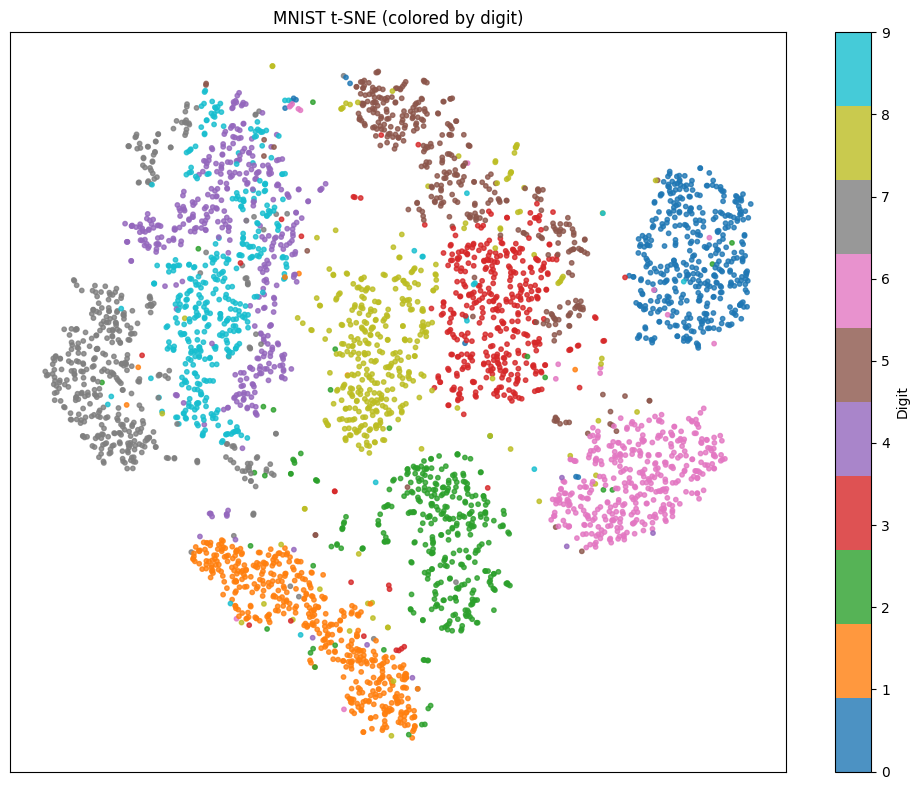

In [24]:
# Your code here
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# --- Optional: subsample for speed (adjust or remove) ---
max_points = 4000
rng = np.random.RandomState(42)
idx = rng.choice(len(X_mnist_train), size=min(max_points, len(X_mnist_train)), replace=False)
X_sub = X_mnist_train[idx]
y_sub = y_mnist_train[idx]

# Optional scaling if pixels are 0..255
if X_sub.max() > 1.0:
    X_sub = X_sub / 255.0

# --- t-SNE directly to 2D (no PCA) ---
tsne = TSNE(
    n_components=2,
    perplexity=30,        # try 20–50 depending on sample size
    learning_rate='auto',
    init='random',        # no PCA init
    random_state=42,
    verbose=1
)
X_tsne = tsne.fit_transform(X_sub)

# --- Plot ---
plt.figure(figsize=(10, 8))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_sub, s=10, alpha=0.8, cmap=plt.cm.get_cmap('tab10', 10))
cbar = plt.colorbar(sc, ticks=range(10))
cbar.set_label("Digit")
plt.title("MNIST t-SNE (colored by digit)")
plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()


2. Try using a KNN classifier to predict the data with TSNE.  How does it perform?

In [31]:
# Your code here
#t-SNE is a visualization tool, not a preprocessing step for classifiers.
#It distorts distances to reveal clusters, so neighbors in t-SNE space don’t reflect true structure.
# Using t-SNE as input for KNN usually gives much worse performance than raw pixels or PCA.

from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# --- Apply t-SNE to training data ---
tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate='auto',
    init='random',
    random_state=42,
    verbose=1
)
X_sub_tsne = tsne.fit_transform(X_sub)

# Split into train/test (80/20)
X_train_tsne, X_test_tsne, y_train_sub, y_test_sub = train_test_split(
    X_sub_tsne, y_sub, test_size=0.2, random_state=42
)

# --- Train KNN on t-SNE data ---
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_tsne, y_train_sub)
y_pred_tsne = knn.predict(X_test_tsne)

# --- Accuracy ---
acc_tsne = accuracy_score(y_test_sub, y_pred_tsne)
print(f"KNN accuracy on t-SNE features: {acc_tsne:.4f}")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.001s...


[t-SNE] Computed neighbors for 4000 samples in 0.798s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 2.278213
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.362076
[t-SNE] KL divergence after 1000 iterations: 1.428684
KNN accuracy on t-SNE features: 0.9062


## Exercise 3

Try using UMAP to process the MNIST data.  Visualize the data first.

In [27]:
# @SHOW
# You might need to install UMAP.  If so, uncomment the following lines and run them

%pip install numpy==2.0
%pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 52.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_3229/1771633143.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  sc = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sub, s=10, alpha=0.8, cmap=plt.cm.get_cmap('tab10', 10))


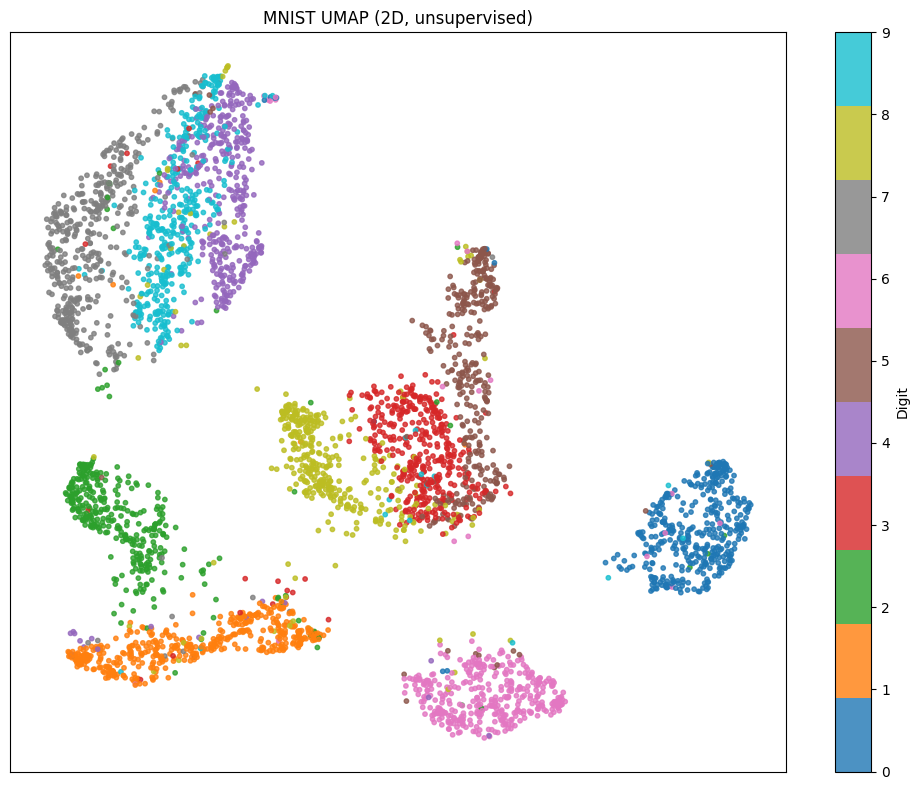

In [30]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
import umap

# ----- UMAP to 2D (unsupervised) -----
umap_2d = umap.UMAP(
    n_neighbors=30,      # local structure; try 15–50
    min_dist=0.1,        # cluster tightness; smaller -> tighter
    n_components=2,
    metric="euclidean",
    random_state=42
)
X_umap = umap_2d.fit_transform(X_sub)

# ----- Plot -----
plt.figure(figsize=(10, 8))
sc = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_sub, s=10, alpha=0.8, cmap=plt.cm.get_cmap('tab10', 10))
cbar = plt.colorbar(sc, ticks=range(10))
cbar.set_label("Digit")
plt.title("MNIST UMAP (2D, unsupervised)")
plt.xticks([]); plt.yticks([])
plt.tight_layout()
plt.show()


Now, calculate accuracy with KNN.

In [29]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import umap

# ----- Train/test split -----
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    X_sub, y_sub, test_size=0.2, random_state=42
)

# ----- UMAP embedding (fit only on training set, then transform test set) -----
umap_model = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    metric="euclidean",
    random_state=42
)
X_train_umap = umap_model.fit_transform(X_train_sub, y=y_train_sub)   # supervised UMAP
X_test_umap  = umap_model.transform(X_test_sub)

# ----- KNN on UMAP-reduced features -----
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train_umap, y_train_sub)
y_pred_umap = knn.predict(X_test_umap)

acc_umap = accuracy_score(y_test_sub, y_pred_umap)
print(f"KNN accuracy on UMAP (2D) features: {acc_umap:.4f}")


/usr/local/python/3.12.1/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


KNN accuracy on UMAP (2D) features: 0.8575


## Exercise 4

In the following, I've set up some sample data. Examine the relative performance of PCA and UMAP; for each, try gradually increasing the number of dimensions and examine the impact on KNN. You should also try different parameter settings for UMAP. Make sure to visualize your data after dimensionality reduction to understand what's going on!

Original Data Accuracy: 0.844


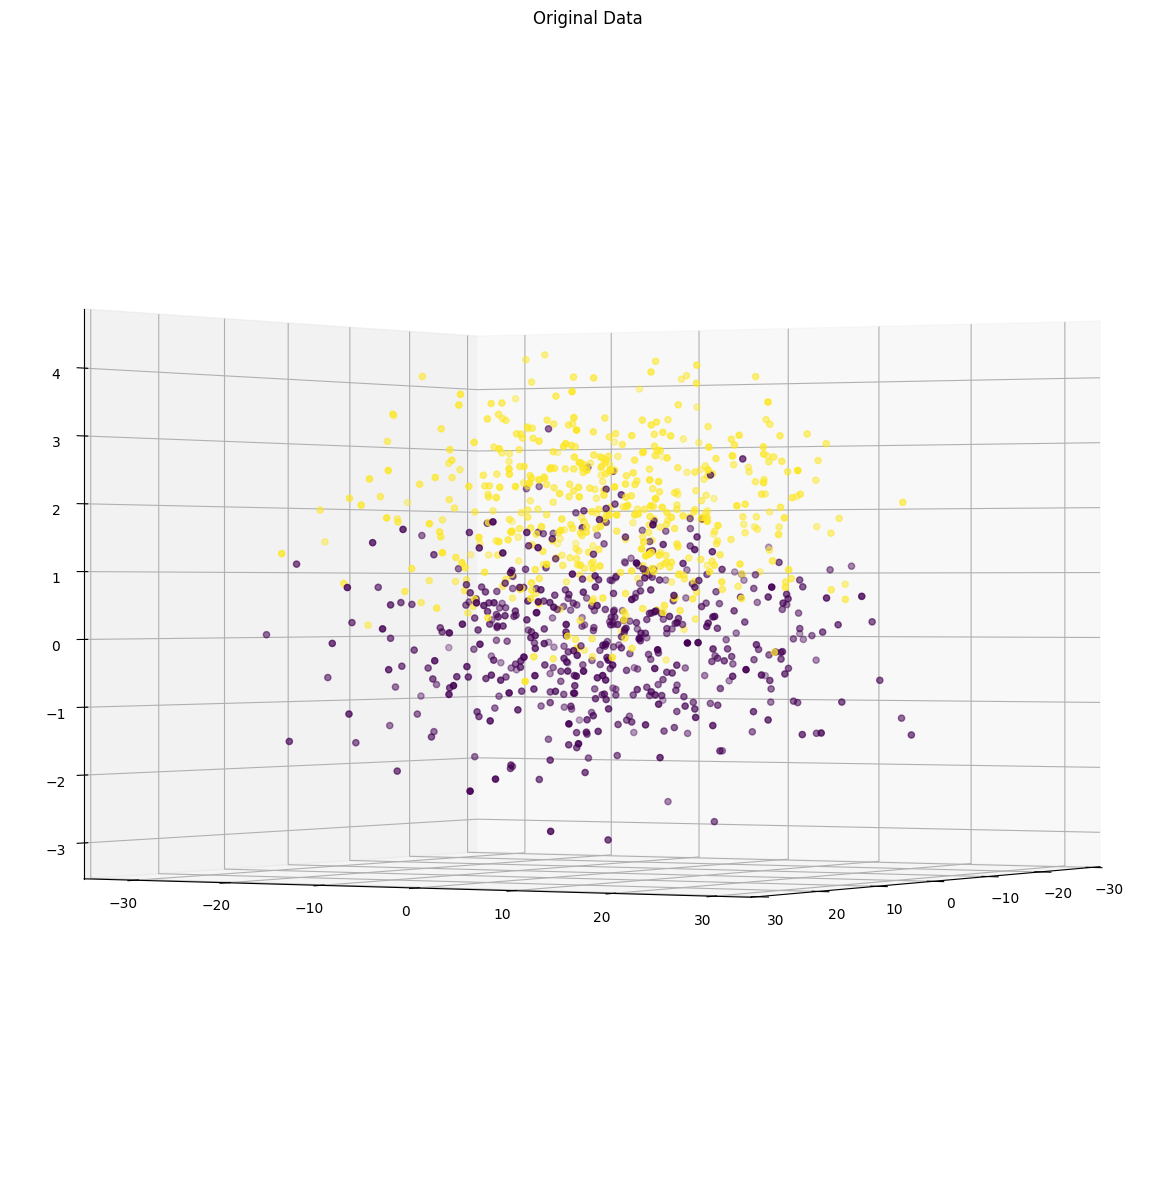

In [ ]:
# @SHOW
# Generate synthetic data
np.random.seed(0)
n_points = 500

# Class 0
x0 = np.random.normal(loc=0, scale=10, size=n_points)
y0 = np.random.normal(loc=0, scale=10, size=n_points)
z0 = np.random.normal(loc=0, scale=1, size=n_points)

# Class 1
x1 = np.random.normal(loc=0, scale=10, size=n_points)
y1 = np.random.normal(loc=0, scale=10, size=n_points)
z1 = np.random.normal(loc=2, scale=1, size=n_points)

X = np.vstack((np.hstack((x0, x1)), np.hstack((y0, y1)), np.hstack((z0, z1)))).T
y = np.hstack((np.zeros(n_points), np.ones(n_points)))

# Train KNN on original data
knn = KNeighborsClassifier()
knn.fit(X, y)
y_pred = knn.predict(X)
print(f"Original Data Accuracy: {accuracy_score(y, y_pred)}")

# Create a new figure
fig = plt.figure(figsize=(15,15))

# Add 3D subplot
# The format is (rows, columns, plot_number)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0, azim=30)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title('Original Data')

plt.show()


In [33]:
# @SHOW
# Set up train and test, and examine predictions without dimensionality reduction

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"Original Data Accuracy: {accuracy_score(y_test, y_pred)}")

Original Data Accuracy: 0.725


1. Try with PCA

In [ ]:
# Your code here
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

dims = [1, 2, 3]
for d in dims:
    pca = PCA(n_components=d, random_state=42)
    X_pca = pca.fit_transform(X)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_pca, y)
    y_pred = knn.predict(X_pca)
    acc = accuracy_score(y, y_pred)
    
    print(f"PCA ({d}D) KNN accuracy: {acc:.4f}")
    
    # Visualization for 2D only
    if d == 2:
        plt.figure(figsize=(6,5))
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=20)
        plt.title("PCA 2D projection")
        plt.show()


2. Try with UMAP.

In [ ]:
# Your code here


In [ ]:
# Your code here


Explain your results in the cell below.  Which works better?  Why?

*Enter your answer in this cell*